In [1]:
%run functions.py

Using TensorFlow backend.


In [2]:
stemmer = StempelStemmer.polimorf()

Loading: 100%|██████████████████████████████████████████████████████| 11368252/11368252 [00:40<00:00, 558163.86bytes/s]

In [3]:
xall,yall = load_data_from_CSV('data.csv')
number_of_classes = 23

In [ ]:
#xAll,yAll=deleteBasedOnIndicesList(xAll,yAll)

In [4]:
print("Set size: ", len(xall))

Set size:  31660


In [5]:
for i in range(0,len(yall)):
    yall[i] = f(float(yall[i]))
for i in range(0,len(xall)):
    xall[i] = str(xall[i])

In [6]:
number_of_samples_for_each_class = count_number_of_samples_for_each_class(yall, number_of_classes)

2000
1070
294
1839
297
1826
2000
2000
242
2000
228
2000
2000
2000
462
2000
871
334
1568
941
1688
2000
2000


In [7]:
weights = assign_weight_for_each_class(len(yall), number_of_samples_for_each_class)

In [8]:
class_weight = {0: weights[0],
                1: weights[1],
                2: weights[2],
                3: weights[3],
                4: weights[4],
                5: weights[5],
                6: weights[6],
                7: weights[7],
                8: weights[8],
                9: weights[9],
                10: weights[10],
                11: weights[11],
                12: weights[12],
                13: weights[13],
                14: weights[14],
                15: weights[15],
                16: weights[16],
                17: weights[17],
                18: weights[18],
                19: weights[19],
                20: weights[20],
                21: weights[21],
                22: weights[22],
               }

In [9]:
yall=to_categorical(yall)

In [10]:
stop_words = set(stopwords.words('polish'))
processed_reviews = []
single_review = "string to iniialize <br /> my email id is charilie@waoow.com. You can also reach to me at charlie's"

for review in range(0,len(xall)):
    post_stemming = []
    single_review = xall[review]
    single_review = single_review.lower()
    single_review = re.sub('<.*?>',' ',single_review)
    single_review = re.sub('\W',' ',single_review)
    single_review = re.sub('\s+[a-zA-Z]\s+',' ', single_review)
    single_review = re.sub('\s+',' ', single_review)       
    word_tokens = word_tokenize(single_review)    
    filtered_sentence = " ".join([w for w in word_tokens if w not in stop_words])
    arr = convert(filtered_sentence)
    if(arr[0] or len(arr)>1):
        for word in arr:
            post_stemming.append(stemmer.stem(word))
    single_review = list_to_string(post_stemming)    
    processed_reviews.append(filtered_sentence)    
print(processed_reviews[0])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(processed_reviews,yall,test_size=0.2,random_state=42)
print("Train-set size: ", len(x_train))
print("Test-set size:  ", len(x_test))

Train-set size:  25328
Test-set size:   6332


In [13]:
data_text = x_train + x_test
num_words = 1000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(data_text)
tokenizer.word_index
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

Loading: 100%|███████████████████████████████████████████████████████| 11368252/11368252 [03:12<00:00, 58961.06bytes/s]


In [14]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

43

In [15]:
pad = 'pre'
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

In [16]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [17]:
embedding_size = 64

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
    tf.keras.layers.Dense(embedding_size, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 23)                1495      
Total params: 139,799
Trainable params: 139,799
Non-trainable params: 0
_________________________________________________________________


In [19]:
optimizer = Adam(lr=0.01)

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [21]:
%%time
y_train=np.array(y_train)
model.fit(x_train_pad, y_train, class_weight=class_weight, validation_split=0.05, epochs=8, batch_size=number_of_classes)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 24061 samples, validate on 1267 samples
Epoch 1/8
24061/24061 [==============================] - 75s 3ms/sample - loss: 2.8449 - acc: 0.0866 - val_loss: 2.7518 - val_acc: 0.1002
Epoch 2/8
24061/24061 [==============================] - 64s 3ms/sample - loss: 2.6737 - acc: 0.1262 - val_loss: 2.6988 - val_acc: 0.1176
Epoch 3/8
24061/24061 [==============================] - 56s 2ms/sample - loss: 2.5911 - acc: 0.1470 - val_loss: 2.6934 - val_acc: 0.1176
Epoch 4/8
24061/24061 [==============================] - 57s 2ms/sample - loss: 2.5411 - acc: 0.1477 - val_loss: 2.7021 - val_acc: 0.1279
Epoch 5/8
24061/24061 [==============================] - 54s 2ms/sample - loss: 2.4908 - acc: 0.1556 - val_loss: 2.7194 - val_acc: 0.1192
Epoch 6/8
24061/24061 [==============================] - 62s 3ms/sample - loss: 2.4342 - acc: 0.1642 - val_loss: 2.7496 - val_acc: 0.1121
Epoch 7/8
24061/24061 [==============================] - 65s 3ms/sample -

In [22]:
%%time
y_pred = model.predict(x=x_test_pad)

Wall time: 4.87 s


In [31]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [33]:
model.save('.')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\assets


In [24]:
y_res=[]
y_test_res=[]
##pred
for i in range(0,len(y_pred)):
    rate=classify_rate(y_pred[i])
    y_res.append(rate)

for i in range(0,len(y_test)):
    rate=np.argmax(y_test[i])
    y_test_res.append(rate)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test_res,y_res)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [26]:
import matplotlib.pyplot as plt

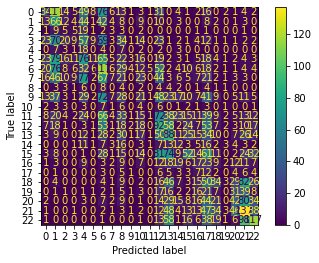

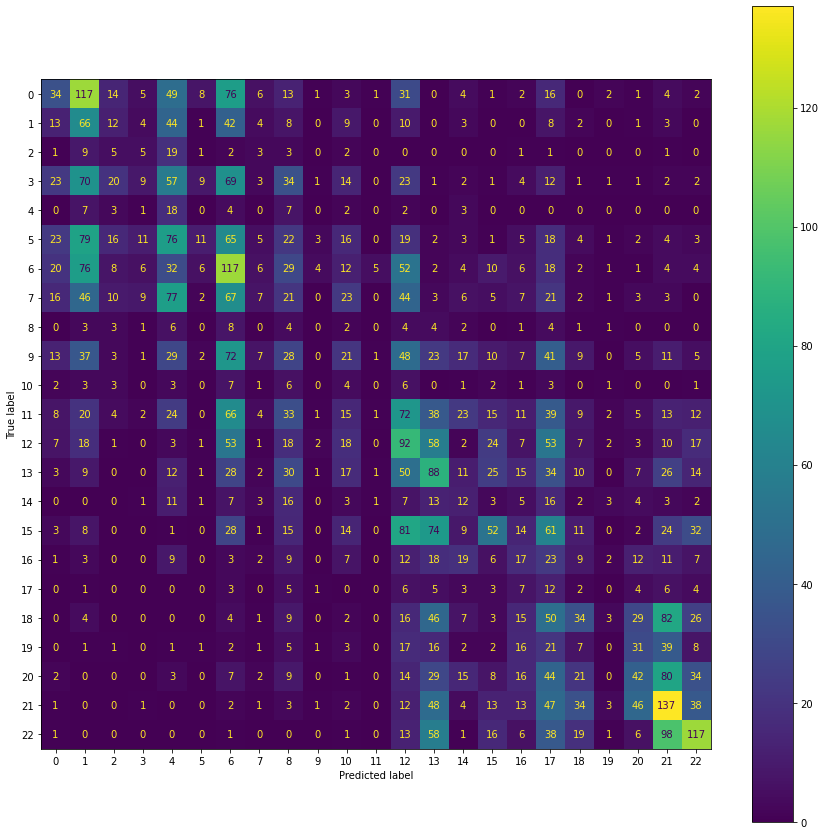

In [27]:
cm=confusion_matrix(y_test_res,y_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
fig, ax = plt.subplots(figsize=(15,15))
cm_display.plot(ax=ax)

In [28]:
listOfTP = [0] * 25
listOfFP = [0] * 25
listOfTN = [0] * 25
listOfFN = [0] * 25

In [29]:
for i in range(0,len(y_test_res)):
    y_test_res[i] = g(float(y_test_res[i]))
for i in range(0,len(y_res)):
    y_res[i] = g(float(y_res[i]))

In [30]:
for i in range(len(listOfTP)): 
    listOfTP[i], listOfFP[i], listOfTN[i], listOfFN[i] = perf_measure(y_test_res, y_res, y_test_res[i])

NameError: name 'yHat' is not defined

In [ ]:
sensitivity = [0] * 25
specificity = [0] * 25
precision = [0] * 25
NPV = [0] * 25

In [ ]:
for i in range(len(sensitivity)): 
    sensitivity[i], specificity[i], precision[i], NPV[i] = calculate_metrics(listOfTP[i], listOfFP[i], listOfTN[i], listOfFN[i])

In [ ]:
sensitivity

In [ ]:
specificity

In [ ]:
precision

In [ ]:
NPV

In [ ]:
myset = set(y_test_res)
print(myset)

In [ ]:
mylist = list(myset)
print (mylist)

In [ ]:
listOfTP